<a href="https://colab.research.google.com/github/AhmadAlAshery/Tensorflow/blob/main/fuzzy%20time%20series%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import zipfile
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error;

In [2]:
pip install -U pyFTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 18.2 MB/s 


In [3]:
import zipfile
with zipfile.ZipFile("drive-download-20220917T132632Z-001.zip","r") as zip_ref:
    zip_ref.extractall()

In [4]:
# load datasets into dataframs
genting_1 = pd.read_csv('1 Singapore Genting G13.SI.csv', parse_dates=['Date'])
airline_2 = pd.read_csv('2 Singapore Airlines C6L.SI.csv', parse_dates=['Date'])
jardine_3 = pd.read_csv('3 Jardine Cycle _ Carriage Limited  C07.SI.csv', parse_dates=['Date'])
cortina_4 = pd.read_csv('4 Cortina Holdings Limited C41.SI.csv', parse_dates=['Date'])
fux_5 = pd.read_csv('5 Fuxing China Group Limited AWK.SI.csv', parse_dates=['Date'])
health_6 = pd.read_csv('6 HealthBank Holdings Limited  40B.SI.csv', parse_dates=['Date'])
mem_7 = pd.read_csv('7 Memories Group Limited 1H4.SI.csv', parse_dates=['Date'])
park_8 = pd.read_csv('8 Parkson Retail Asia Limited O9E.SI.csv', parse_dates=['Date'])
pav_9 = pd.read_csv('9 Pavillon Holdings Ltd 596.SI.csv', parse_dates=['Date'])
uni_10 = pd.read_csv('10 Uni-Asia Group Limited CHJ.SI.csv', parse_dates=['Date'])

In [5]:
data = {0:genting_1,
        1:airline_2,
        2:jardine_3,
        3:cortina_4,
        4:fux_5,
        5:health_6,
        6:mem_7,
        7:park_8,
        8:pav_9,
        9:uni_10}

data_names = {0:'Singapore Genting G13.SI',
        1:'Singapore Airlines C6L.SI',
        2:'Jardine Cycle & Carriage Limited  C07.SI',
        3:'Cortina Holdings Limited C41.SI',
        4:'Fuxing China Group Limited AWK.SI',
        5:'HealthBank Holdings Limited  40B.SI',
        6:'Memories Group Limited 1H4.SI',
        7:'Parkson Retail Asia Limited O9E.SI',
        8:'Pavillon Holdings Ltd 596.SI',
        9:'Uni-Asia Group Limited CHJ.SI'}

In [6]:
for i in range(10):
    data[i].dropna(inplace=True)

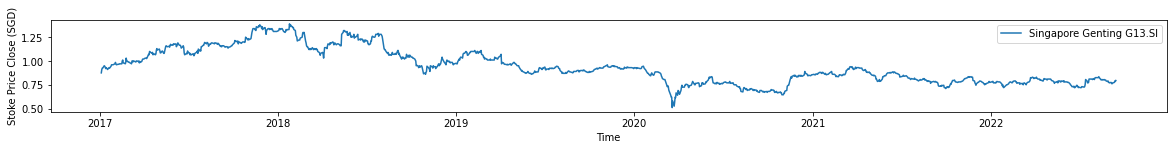

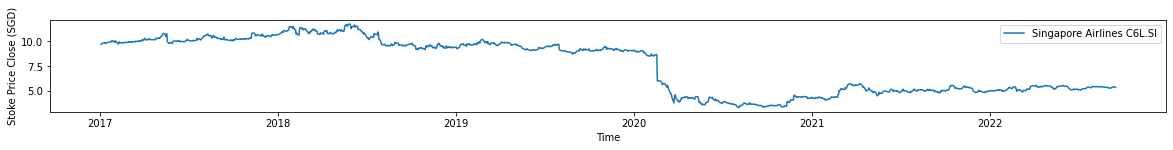

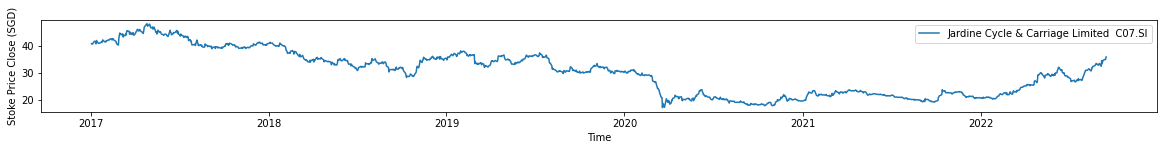

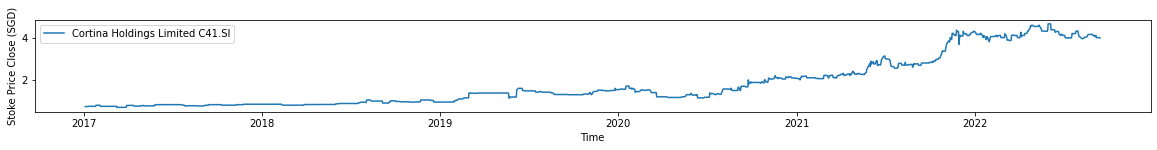

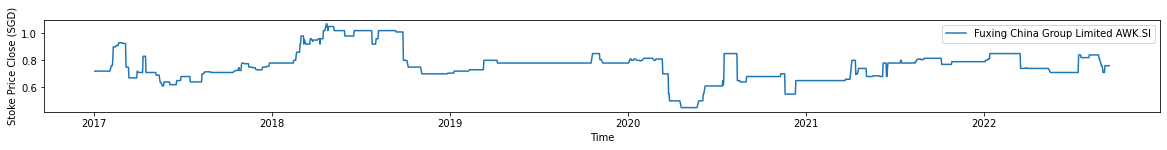

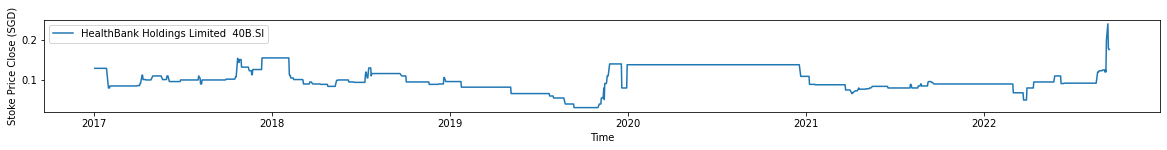

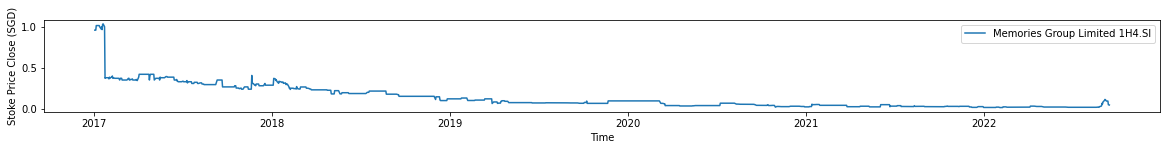

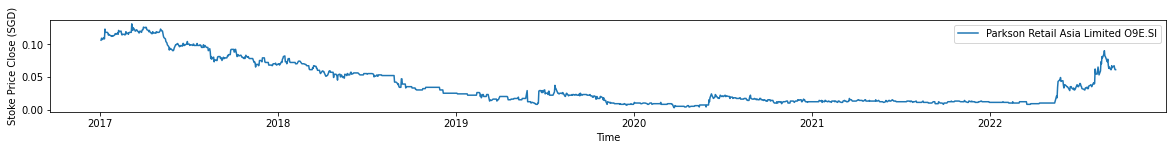

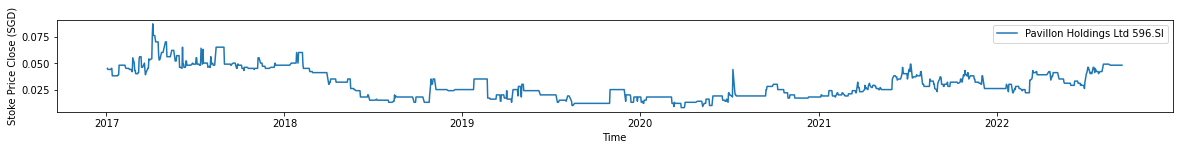

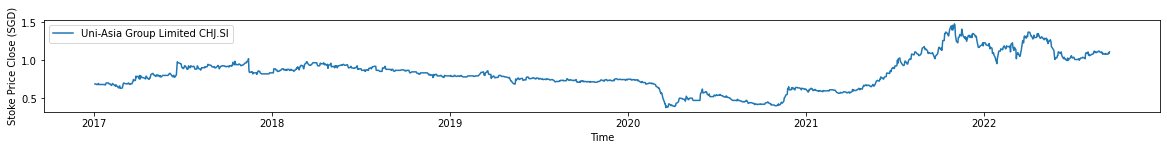

In [7]:
for i in range(10):
    plt.figure(figsize=(20,20))
    plt.subplot(10,1,i+1)
    plt.plot(data[i]["Date"], data[i]['Close'], label=data_names[i])
    plt.xlabel('Time')
    plt.ylabel("Stoke Price Close (SGD)")
    plt.legend()
    plt.show()

In [8]:
data_len = len(data[0])
train_len = int(np.ceil(data_len*0.8)) 
test_len = data_len - train_len
data_len, train_len, test_len

(1435, 1148, 287)

In [9]:
data[0]["Close"].values.reshape(-1,1)

array([[0.875],
       [0.91 ],
       [0.925],
       ...,
       [0.79 ],
       [0.785],
       [0.795]])

In [10]:
d = []

In [11]:
for i in range(10):
    d.append(data[i]["Close"].values.reshape(-1,1))

In [12]:
train= []
test = []

In [13]:
for i in range(10):
    train.append(d[i][:train_len])
    test.append(d[i][-test_len:])

In [14]:
train[0].shape, test[0].shape

((1148, 1), (287, 1))

In [15]:
train = np.array(train)
test = np.array(test)

In [16]:
train.shape, test.shape

((10, 1148, 1), (10, 287, 1))

In [17]:
from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

In [18]:
dataset_diff = []
for i in range(10):
    dataset_diff.append(np.array(tdiff.apply(list(train[i]))).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
dataset_diff[0].shape

(1148, 1)

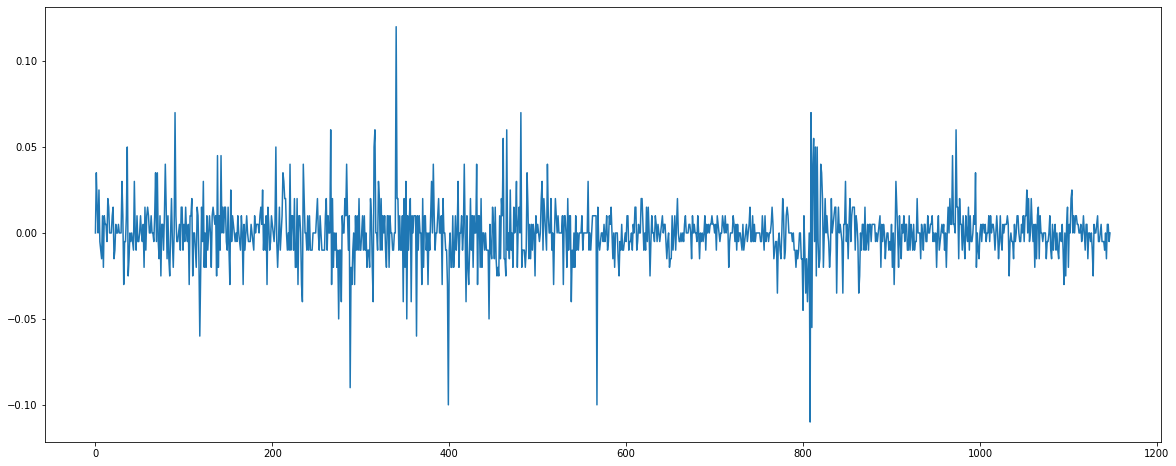

In [20]:
plt.figure(figsize=(20,8))
plt.plot(range(1148), dataset_diff[0])

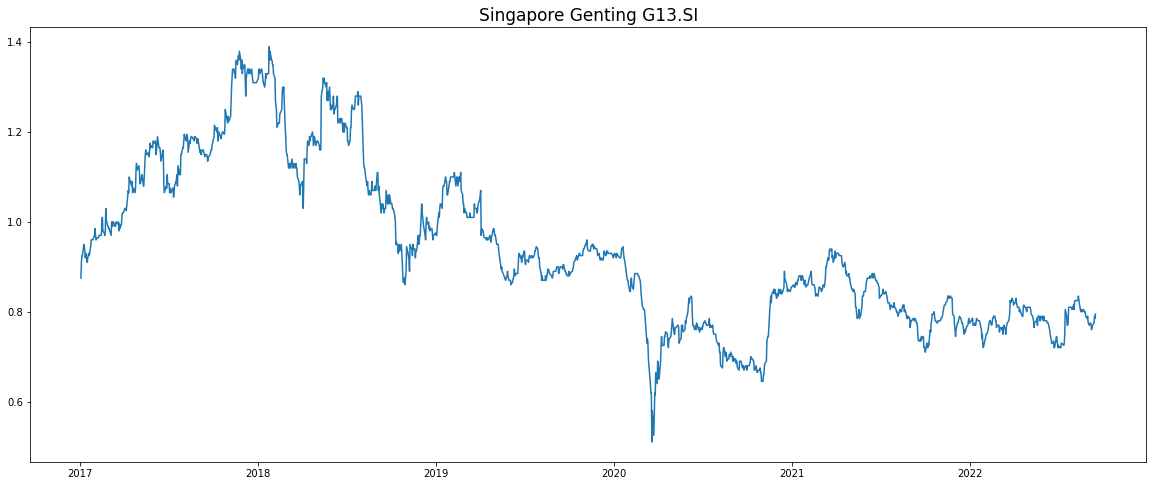

In [112]:
plt.figure(figsize=(20,8))
plt.plot(data[0]["Date"], d[0])
plt.title(data_names[0], fontsize=17);

## trial



In [22]:
from pyFTS.partitioners import Grid, Entropy, Util as pUtil
fs = Grid.GridPartitioner(data=train[0], npart=20)
print(fs)

Grid:
A0: trimf([0.4055, 0.459, 0.5125])
A1: trimf([0.45899999999999996, 0.5125, 0.566])
A2: trimf([0.5124999999999998, 0.5659999999999998, 0.6194999999999998])
A3: trimf([0.5659999999999998, 0.6194999999999998, 0.6729999999999998])
A4: trimf([0.6194999999999998, 0.6729999999999998, 0.7264999999999998])
A5: trimf([0.6729999999999997, 0.7264999999999997, 0.7799999999999997])
A6: trimf([0.7264999999999996, 0.7799999999999996, 0.8334999999999996])
A7: trimf([0.7799999999999996, 0.8334999999999996, 0.8869999999999996])
A8: trimf([0.8334999999999996, 0.8869999999999996, 0.9404999999999996])
A9: trimf([0.8869999999999995, 0.9404999999999994, 0.9939999999999994])
A10: trimf([0.9404999999999993, 0.9939999999999993, 1.0474999999999994])
A11: trimf([0.9939999999999994, 1.0474999999999994, 1.1009999999999995])
A12: trimf([1.0474999999999994, 1.1009999999999993, 1.1544999999999992])
A13: trimf([1.100999999999999, 1.1544999999999992, 1.2079999999999993])
A14: trimf([1.1544999999999992, 1.2079999999

In [23]:
from pyFTS.models import chen
model_chen = chen.ConventionalFTS(partitioner=fs)
model_chen.fit(train[0])
print(model_chen)

Conventional FTS:
A1 -> A2
A2 -> A1,A3
A3 -> A1,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A9
A11 -> A10,A11,A12
A12 -> A11,A12,A13
A13 -> A12,A13,A14,A15
A14 -> A13,A14,A15
A15 -> A14,A15,A16
A16 -> A14,A15,A16,A17
A17 -> A16,A17



In [24]:
forecasts_chen = model_chen.predict(test[0])

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


In [25]:
forecasts_chen = np.array(forecasts_chen).reshape(-1,1)

In [28]:
def forecast_extender(forecast,c):
    x = []
    arr=np.full((c,1),np.nan)
    x.append(np.concatenate((arr, forecast), axis=0).reshape(-1,1))
    x = np.array(x).reshape(-1,1)
    return x

In [29]:
forecasts_chen = forecast_extender(forecasts_chen,data_len - len(forecasts_chen))

In [129]:
y_metrics_names = ["Mean Absolute Error : ",
                   "Mean Squared Error : ",
                   "Root Mean Squared Error : ",
                   "Mean Absolute Percentage Error : "]

y_metrics_0 = []

In [130]:
def plot_fig(d, x, label, y_metrics):    
    plt.figure(figsize=(20,8))
    plt.plot(data[0]["Date"], d,color='b', label='original')
    plt.plot(data[0]["Date"], x, color='r', label='prediction')
    plt.title(label ,fontsize=20)
    plt.legend()
    plt.show()
    t = np.count_nonzero(~np.isnan(x))
    mae = mean_absolute_error(d[-t:,], x[-t:,])
    mse = mean_squared_error(d[-t:,], x[-t:,])
    rmse = np.sqrt(mean_squared_error(d[-t:,], x[-t:,]))
    mape = mean_absolute_percentage_error(d[-t:,], x[-t:,])
    y_metrics.append(mae)
    y_metrics.append(mse)
    y_metrics.append(rmse)
    y_metrics.append(mape)
    print("Mean Absolute Error : {}".format(mae))
    print("Mean Squared Error : {}".format(mse))
    print("Root Mean Squared Error : {}".format(rmse))
    print("Mean Absolute Percentage Error : {}".format(mape))

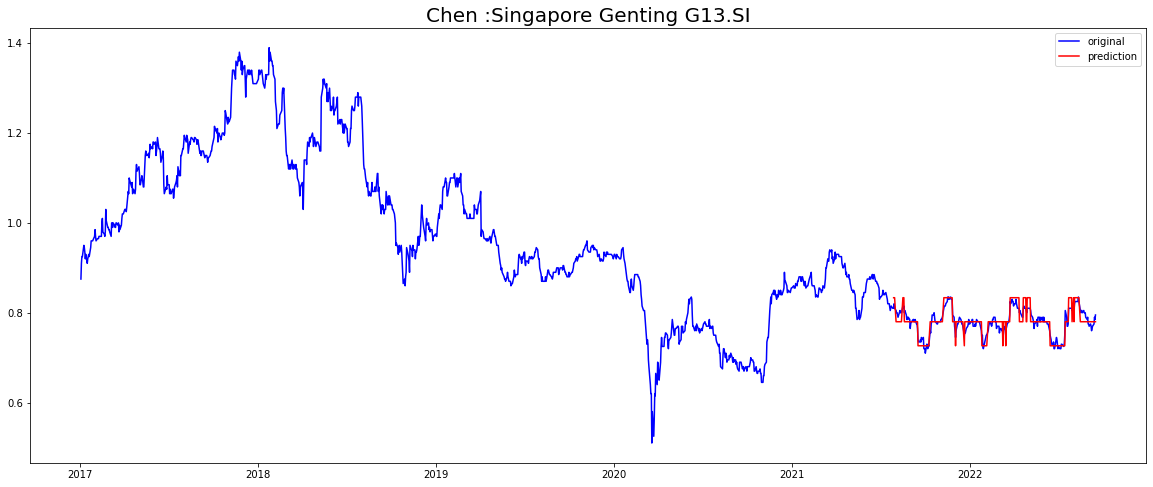

Mean Absolute Error : 0.0109808362369338
Mean Squared Error : 0.00018413501742160204
Root Mean Squared Error : 0.013569635861790915
Mean Absolute Percentage Error : 0.014024811508323272


In [131]:
plot_fig(d[0], forecasts_chen, 'Chen :'+data_names[0], y_metrics_0)

In [33]:
from pyFTS.models import chen, ensemble, ifts, pwfts

In [35]:
model_ifts = ifts.IntervalFTS(partitioner=fs)
model_ifts.fit(np.array(train[0]).reshape(-1))

In [36]:
forecasts_ifts = model_ifts.predict(np.array(test[0]).reshape(-1))

In [37]:
forecasts_ifts = np.array(forecasts_ifts).reshape(-1,1)

In [38]:
forecasts_ifts = forecast_extender(forecasts_ifts, data_len-len(forecasts_ifts))

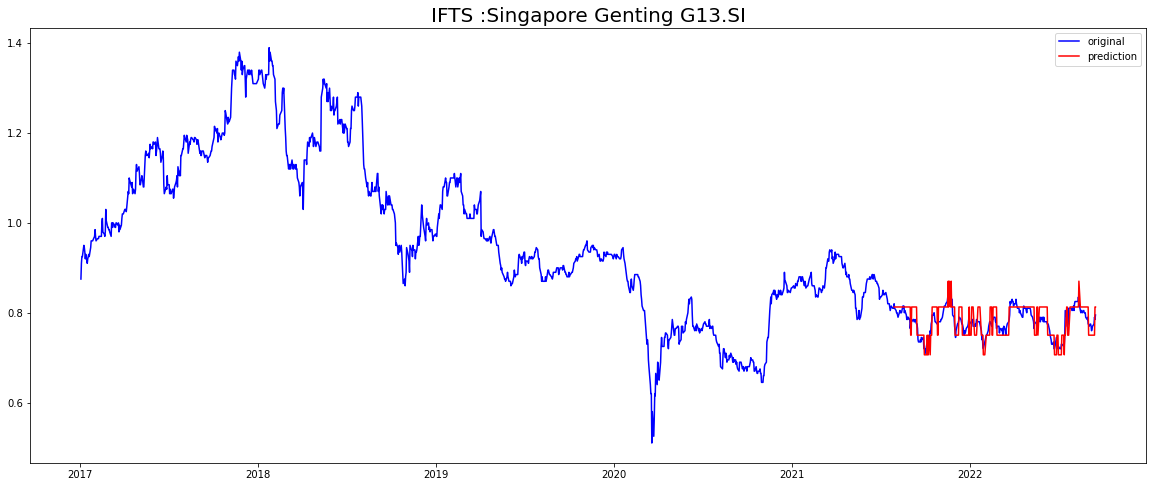

Mean Absolute Error : 0.01999715988843737
Mean Squared Error : 0.000542695993414839
Root Mean Squared Error : 0.02329583639655033
Mean Absolute Percentage Error : 0.02571481120199209


In [132]:
plot_fig(d[0], forecasts_ifts, 'IFTS :'+ data_names[0], y_metrics_0)

In [48]:
model_pwfts = pwfts.ProbabilisticWeightedFTS(partitioner=fs)
model_pwfts.fit(np.array(train[0]).reshape(-1))

In [74]:
forecasts_pwfts = model_pwfts.predict(np.array(test[0]).reshape(-1))

In [75]:
forecasts_pwfts = np.array(forecasts_pwfts).reshape(-1,1)

In [76]:
forecasts_pwfts = forecast_extender(forecasts_pwfts, data_len-len(forecasts_pwfts))

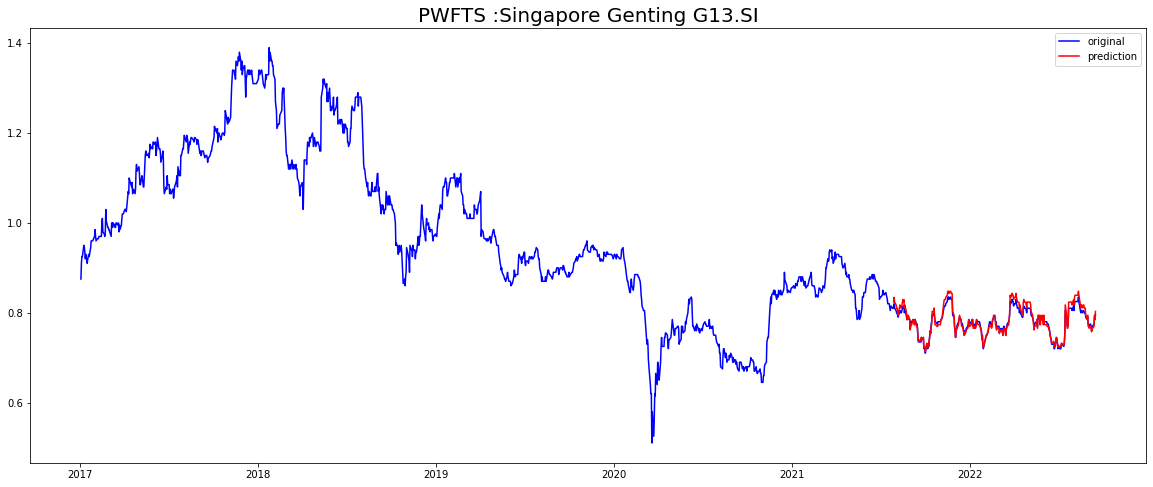

Mean Absolute Error : 0.006394639761324519
Mean Squared Error : 6.243356108237233e-05
Root Mean Squared Error : 0.007901491067031103
Mean Absolute Percentage Error : 0.008036475434379197


In [133]:
plot_fig(d[0], forecasts_pwfts, 'PWFTS :'+ data_names[0], y_metrics_0)

In [121]:
def plot_metrics(y, y_names):
    plt.figure(figsize=(20,8))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.title(y_names[i], fontsize=17)
        plt.plot(["Chen", "IFTS", "PWFTS"], [y[i],y[i+4],y[i+8]]);


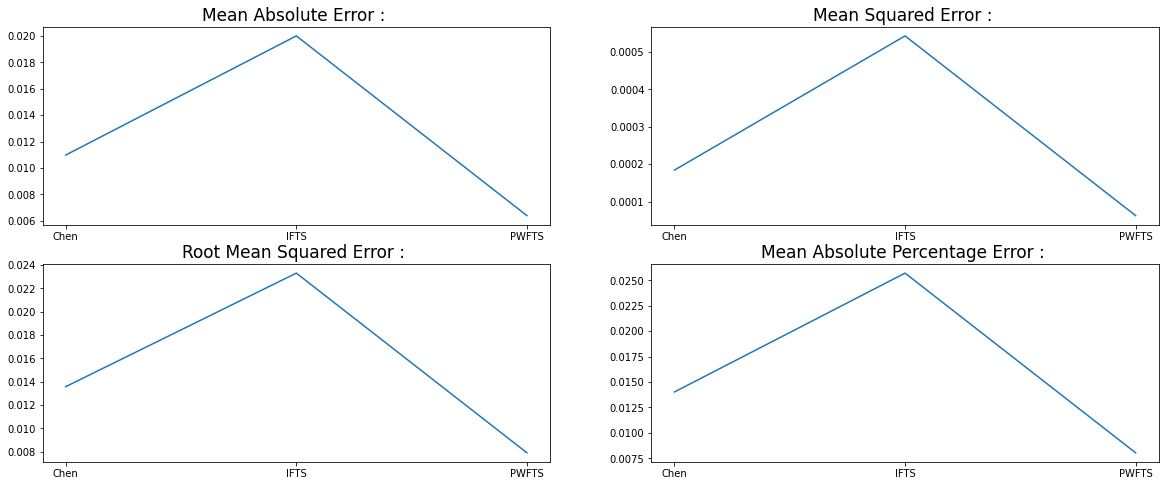

In [134]:
plot_metrics(y_metrics_0, y_metrics_names)

In [127]:
def plot_all(r, _chen, _ifts, _pwfts, n, nn):
    plt.figure(figsize=(20,8))
    plt.plot(r[n]["Date"][-nn:], d[n][-nn:],color='b', label='original')
    plt.plot(r[n]["Date"][-nn:], _chen[-nn:], '--r', label='Chen_prediction')
    plt.plot(r[n]["Date"][-nn:], _ifts[-nn:], ':k', label='IFTS_prediction')
    plt.plot(r[n]["Date"][-nn:], _pwfts[-nn:], color='g', label='PWFTS_prediction')
    plt.title(data_names[n] ,fontsize=20)
    plt.legend()    
    plt.show()

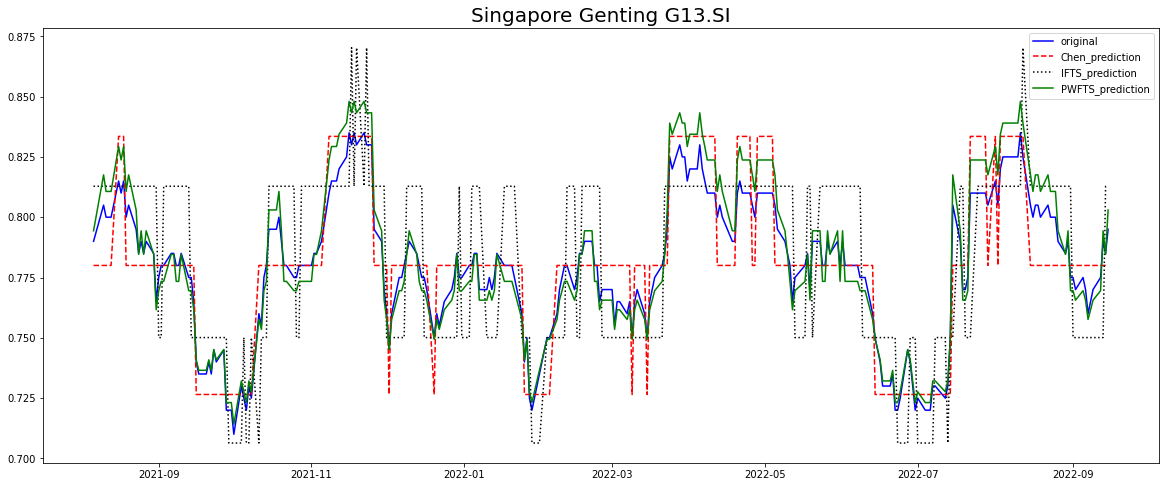

In [128]:
plot_all(data, forecasts_chen, forecasts_ifts, forecasts_pwfts, 0, 280)

## 2

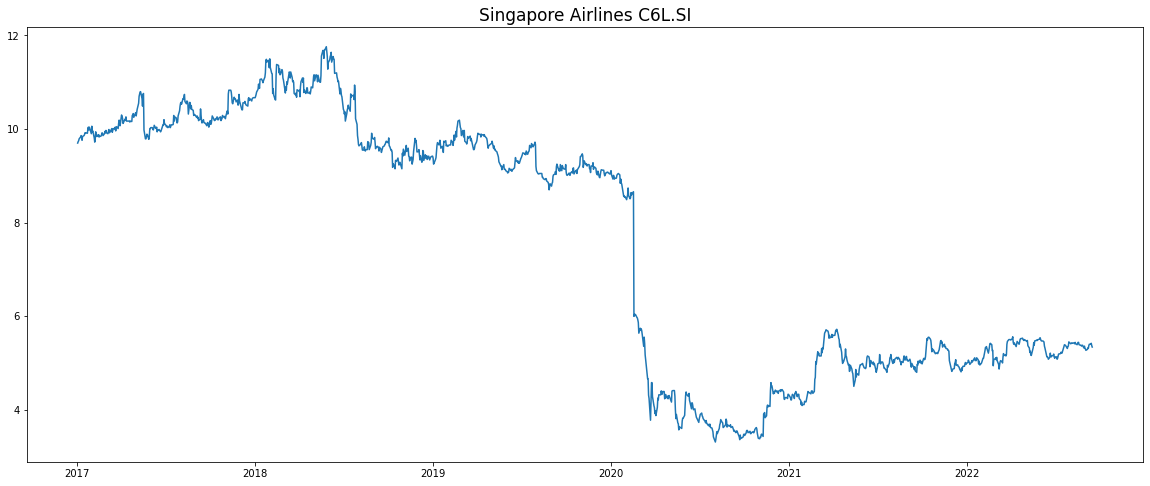

In [160]:
plt.figure(figsize=(20,8))
plt.plot(data[1]["Date"], d[1])
plt.title(data_names[1], fontsize=17);

In [161]:
fs_1 = Grid.GridPartitioner(data=train[1], npart=20)
print(fs_1)

Grid:
A0: trimf([2.48115, 2.979, 3.47685])
A1: trimf([2.979, 3.47685, 3.9747000000000003])
A2: trimf([3.47685, 3.9747000000000003, 4.47255])
A3: trimf([3.9747, 4.47255, 4.9704])
A4: trimf([4.472550000000001, 4.970400000000001, 5.46825])
A5: trimf([4.9704000000000015, 5.468250000000001, 5.966100000000001])
A6: trimf([5.468250000000001, 5.966100000000001, 6.4639500000000005])
A7: trimf([5.966100000000001, 6.4639500000000005, 6.9618])
A8: trimf([6.463950000000001, 6.961800000000001, 7.459650000000001])
A9: trimf([6.961800000000001, 7.459650000000001, 7.9575000000000005])
A10: trimf([7.459650000000002, 7.957500000000001, 8.455350000000001])
A11: trimf([7.957500000000003, 8.455350000000003, 8.953200000000002])
A12: trimf([8.455350000000003, 8.953200000000002, 9.451050000000002])
A13: trimf([8.953200000000002, 9.451050000000002, 9.948900000000002])
A14: trimf([9.451050000000002, 9.948900000000002, 10.446750000000002])
A15: trimf([9.948900000000002, 10.446750000000002, 10.944600000000001])
A1

In [162]:
model_chen = chen.ConventionalFTS(partitioner=fs_1)
model_chen.fit(train[1])
print(model_chen)

Conventional FTS:
A1 -> A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6
A11 -> A11,A12,A6
A12 -> A11,A12,A13
A13 -> A12,A13,A14
A14 -> A13,A14,A15
A15 -> A14,A15,A16
A16 -> A14,A15,A16,A17
A17 -> A16,A17,A18
A18 -> A17



In [163]:
forecasts_chen_1 = model_chen.predict(test[1])
forecasts_chen_1 = np.array(forecasts_chen_1).reshape(-1,1)
forecasts_chen_1 = forecast_extender(forecasts_chen_1,data_len - len(forecasts_chen_1))
y_metrics_1 = []

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


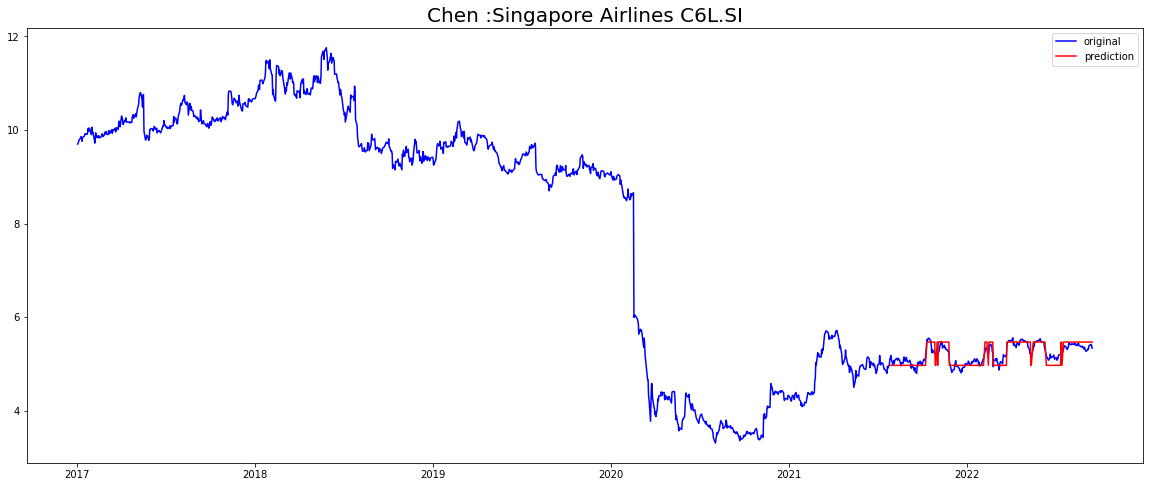

Mean Absolute Error : 0.09706620209059245
Mean Squared Error : 0.013828269912892025
Root Mean Squared Error : 0.11759366442496817
Mean Absolute Percentage Error : 0.018691758449471806


In [164]:
plot_fig(d[1], forecasts_chen_1, 'Chen :'+data_names[1], y_metrics_1)

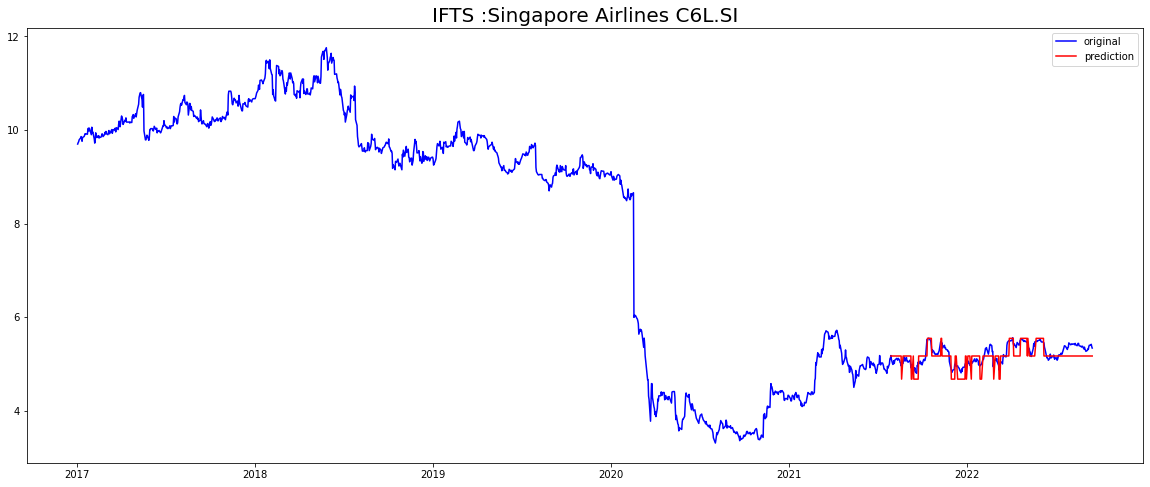

Mean Absolute Error : 0.14400907494858597
Mean Squared Error : 0.028933338682026122
Root Mean Squared Error : 0.1700980266846918
Mean Absolute Percentage Error : 0.02774209397993068


In [165]:
model_ifts_1 = ifts.IntervalFTS(partitioner=fs_1)
model_ifts_1.fit(np.array(train[1]).reshape(-1))
forecasts_ifts_1 = model_ifts_1.predict(np.array(test[1]).reshape(-1))
forecasts_ifts_1 = np.array(forecasts_ifts_1).reshape(-1,1)
forecasts_ifts_1 = forecast_extender(forecasts_ifts_1, data_len-len(forecasts_ifts_1))
plot_fig(d[1], forecasts_ifts_1, 'IFTS :'+ data_names[1], y_metrics_1)

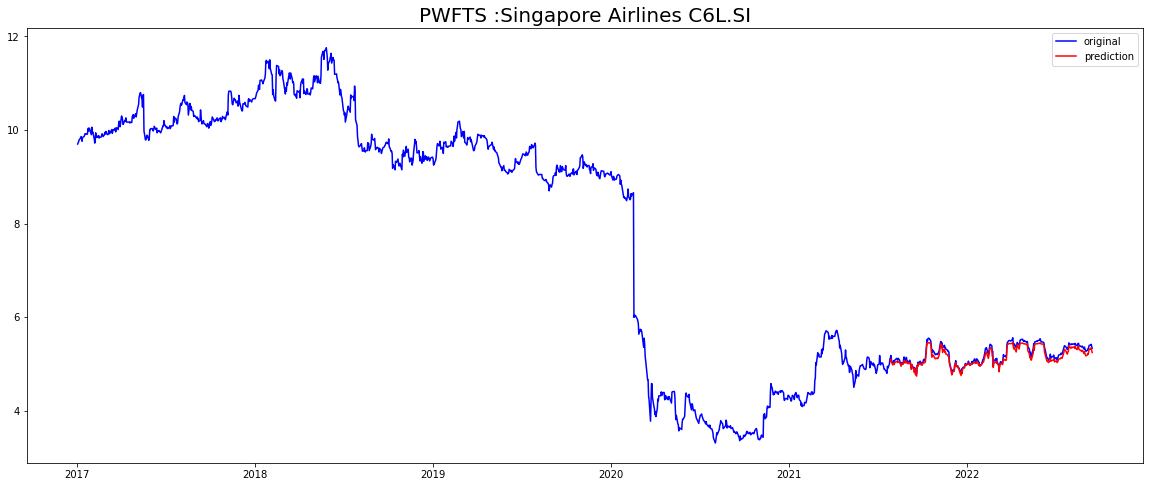

Mean Absolute Error : 0.06081766313101285
Mean Squared Error : 0.004502454440603243
Root Mean Squared Error : 0.06710033115121894
Mean Absolute Percentage Error : 0.011550542214383617


In [166]:
model_pwfts_1 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_1)
model_pwfts_1.fit(np.array(train[1]).reshape(-1))
forecasts_pwfts_1 = model_pwfts_1.predict(np.array(test[1]).reshape(-1))
forecasts_pwfts_1 = np.array(forecasts_pwfts_1).reshape(-1,1)
forecasts_pwfts_1 = forecast_extender(forecasts_pwfts_1, data_len-len(forecasts_pwfts_1))
plot_fig(d[1], forecasts_pwfts_1, 'PWFTS :'+ data_names[1], y_metrics_1)

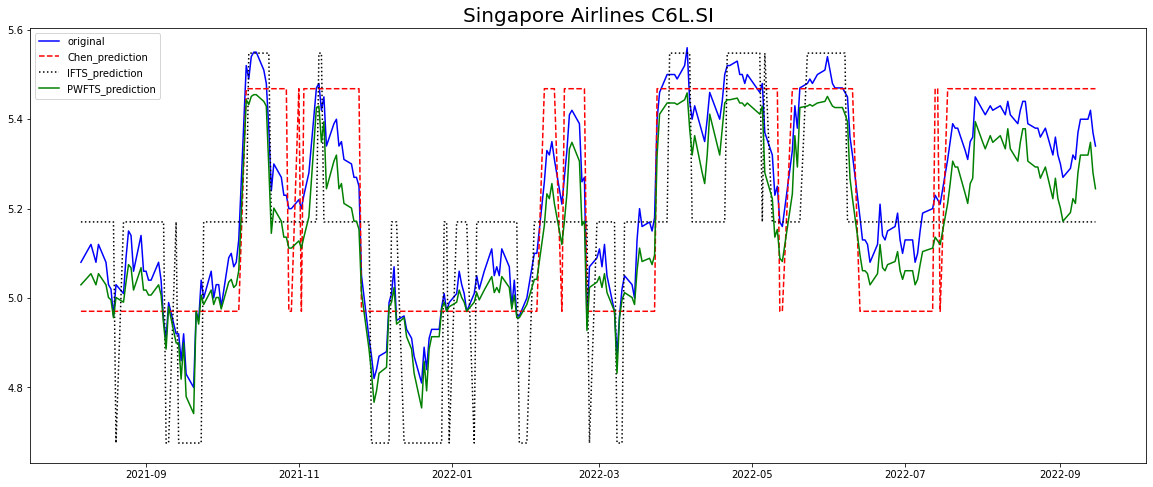

In [168]:
plot_all(data, forecasts_chen_1, forecasts_ifts_1, forecasts_pwfts_1, 1, 280)

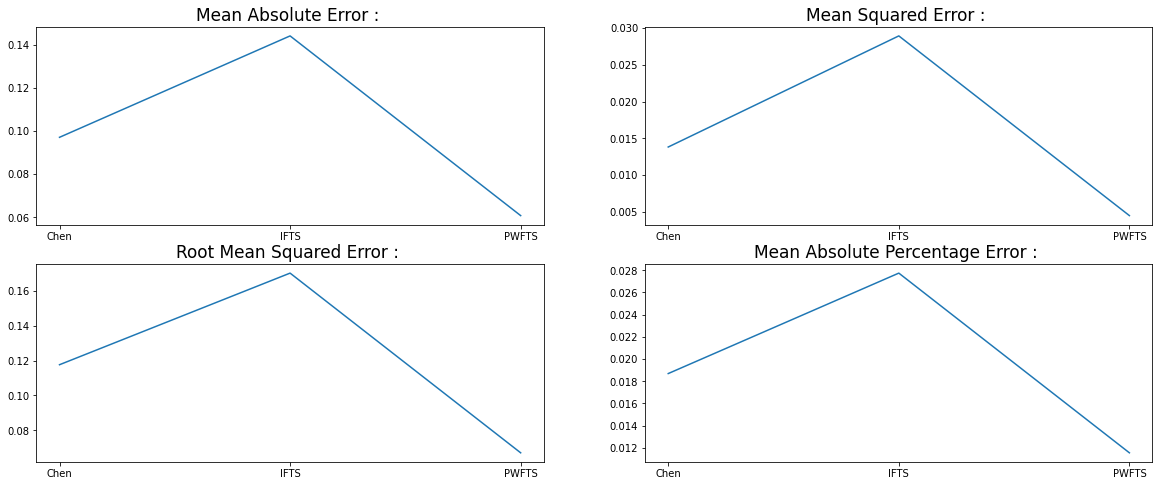

In [167]:
plot_metrics(y_metrics_1, y_metrics_names)

## 3